In [1]:
import numpy as np
import pickle
import math
from scipy.stats import sem
import matplotlib.pyplot as plt
import pandas as pd
import time
import pprint
import seaborn as sns
import statsmodels.formula.api as smf
import CMR_IA as cmr
import scipy as sp
sns.set_context('paper')
pd.set_option('display.max_columns', None)

In [2]:
with open("simu7_data/simu7_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)
# df_study = df_study.loc[df_study.session < 500]
# df_test = df_test.loc[df_test.session < 500]

In [3]:
df_study

,study_itemno1,study_itemno2,study_item1,study_item2,serial_pos,list,session
0,110,1083,BED,PLANT,0,0,0
1,1262,1627,SEAL,WRITER,1,0,0
2,738,1198,INMATE,ROBE,2,0,0
3,187,748,BUG,JAM,3,0,0
4,1423,1072,SWORD,PIN,4,0,0
...,...,...,...,...,...,...,...
191995,187,1314,BUG,SKELETON,7,15,999
191996,1438,1433,TAXI,TAPE,8,15,999
191997,1537,1489,UNDERWEAR,TOWEL,9,15,999
191998,386,283,COUCH,CHAUFFEUR,10,15,999


In [4]:
df_test

,test_itemno,test_item,correct_ans,study_pos,test_dir,list,session
0,324,CLIPPERS,823,9,1,0,0
1,1347,SPARROW,1051,8,1,0,0
2,413,CROSS,524,7,0,0,0
3,812,LEOPARD,1323,5,0,0,0
4,110,BED,1083,0,0,0,0
...,...,...,...,...,...,...,...
127995,947,NEUTRON,402,11,0,15,999
127996,467,DINER,1441,2,1,15,999
127997,1444,TEENAGER,1014,4,0,15,999
127998,1489,TOWEL,1537,9,1,15,999


### Run CMR-IA

In [5]:
s_mat = np.load('../../Data/wordpools/ltp_FR_similarity_matrix.npy')

In [6]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.5,
    beta_rec = 0.1,
    beta_cue = 0.5,
    beta_distract = 0.1,
    beta_rec_post = 0.1,
    gamma_fc = 0.4,  
    gamma_cf = 0.6,  # cf - fc Higher, ILI +1 Higher
    s_fc = 0.2,
    s_cf = 0.2,
    c_thresh = 0.01,
    kappa = 0.08,
    lamb = 0.04,
    eta = 0.02,
    omega = 5,  # this is important for increasing PLI num
    alpha = 1,
    phi_s = 0.5,
    phi_d = 0.5,
    nitems_in_accumulator = 48,
    d_ass = 0.8
)
params

{'beta_enc': 0.5,
 'beta_rec': 0.1,
 'beta_cue': 0.5,
 'beta_rec_post': 0.1,
 'beta_distract': 0.1,
 'phi_s': 0.5,
 'phi_d': 0.5,
 's_cf': 0.2,
 's_fc': 0.2,
 'kappa': 0.08,
 'eta': 0.02,
 'omega': 5,
 'alpha': 1,
 'c_thresh': 0.01,
 'c_thresh_itm': 0.5,
 'c_thresh_ass': 0.5,
 'd_ass': 0.8,
 'lamb': 0.04,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 48,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'm': 0,
 'n': 1,
 'c1': 0,
 'thresh_sigma': 0,
 'No_recall': None,
 'var_enc': 1,
 'bad_enc_ratio': 1,
 'gamma_fc': 0.4,
 'gamma_cf': 0.6}

In [7]:
df_simu, f_in, f_dif = cmr.run_norm_cr_multi_sess(params,df_study, df_test ,s_mat)
df_simu

CMR2 Time: 501.81006622314453


,list,session,test_itemno,s_resp,s_rt,csim
0,0,0,324,879.0,1270.0,0.629262
1,0,0,1347,679.0,2180.0,0.686417
2,0,0,413,524.0,1310.0,0.853838
3,0,0,812,823.0,2140.0,0.686920
4,0,0,110,1323.0,2310.0,0.720302
...,...,...,...,...,...,...
127995,15,999,947,402.0,1710.0,0.831846
127996,15,999,467,-1.0,-1.0,-1.000000
127997,15,999,1444,-1.0,-1.0,-1.000000
127998,15,999,1489,1537.0,3250.0,0.854345


In [8]:
df_simu = df_simu.merge(df_test,on=['session','list','test_itemno'])
df_simu['correct'] = df_simu.s_resp == df_simu.correct_ans
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct
0,0,0,324,879.0,1270.0,0.629262,CLIPPERS,823,9,1,False
1,0,0,1347,679.0,2180.0,0.686417,SPARROW,1051,8,1,False
2,0,0,413,524.0,1310.0,0.853838,CROSS,524,7,0,True
3,0,0,812,823.0,2140.0,0.686920,LEOPARD,1323,5,0,False
4,0,0,110,1323.0,2310.0,0.720302,BED,1083,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,1710.0,0.831846,NEUTRON,402,11,0,True
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False
127998,15,999,1489,1537.0,3250.0,0.854345,TOWEL,1537,9,1,True


In [9]:
sessions = np.unique(df_simu.session)
nlist = len(np.unique(df_simu.list))
resp_study_list = []
resp_study_pos = []
for sess in sessions:
    
    pres_words = df_study.loc[df_study.session == sess, ['study_itemno1','study_itemno2']].to_numpy()
    pres_words = np.reshape(pres_words,(nlist,-1,2))
    responses = df_simu.loc[df_simu.session == sess, 's_resp']

    for r in responses:
        if r == -1:
            r_list = None
            r_pos = None
        else:
            r_list = np.where(pres_words==r)[0].item()
            r_pos = np.where(pres_words==r)[1].item()
        resp_study_list.append(r_list)
        resp_study_pos.append(r_pos)

df_simu['resp_study_list'] = resp_study_list
df_simu['resp_study_pos'] = resp_study_pos
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos
0,0,0,324,879.0,1270.0,0.629262,CLIPPERS,823,9,1,False,0.0,6.0
1,0,0,1347,679.0,2180.0,0.686417,SPARROW,1051,8,1,False,0.0,6.0
2,0,0,413,524.0,1310.0,0.853838,CROSS,524,7,0,True,0.0,7.0
3,0,0,812,823.0,2140.0,0.686920,LEOPARD,1323,5,0,False,0.0,9.0
4,0,0,110,1323.0,2310.0,0.720302,BED,1083,0,0,False,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,1710.0,0.831846,NEUTRON,402,11,0,True,15.0,11.0
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN
127998,15,999,1489,1537.0,3250.0,0.854345,TOWEL,1537,9,1,True,15.0,9.0


In [10]:
df_simu['list_lag'] = df_simu['resp_study_list'] - df_simu['list']
df_simu['pos_lag'] = df_simu['resp_study_pos'] - df_simu['study_pos']

def which_intrusion(x):
    x_list_lag = x['list_lag']
    x_pos_lag = x['pos_lag']

    if math.isnan(x_list_lag):
        return 'NoResp'
    elif x_list_lag == 0 and x_pos_lag == 0:
        return 'Correct'
    elif x_list_lag != 0:
        return 'PLI'
    elif x_list_lag == 0 and x_pos_lag != 0:
        return 'ILI'
    else:
        return 'Else'

df_simu['intrusion_type'] = df_simu.apply(lambda x:which_intrusion(x),axis=1)
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
0,0,0,324,879.0,1270.0,0.629262,CLIPPERS,823,9,1,False,0.0,6.0,0.0,-3.0,ILI
1,0,0,1347,679.0,2180.0,0.686417,SPARROW,1051,8,1,False,0.0,6.0,0.0,-2.0,ILI
2,0,0,413,524.0,1310.0,0.853838,CROSS,524,7,0,True,0.0,7.0,0.0,0.0,Correct
3,0,0,812,823.0,2140.0,0.686920,LEOPARD,1323,5,0,False,0.0,9.0,0.0,4.0,ILI
4,0,0,110,1323.0,2310.0,0.720302,BED,1083,0,0,False,0.0,5.0,0.0,5.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,1710.0,0.831846,NEUTRON,402,11,0,True,15.0,11.0,0.0,0.0,Correct
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN,NaN,NaN,NoResp
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN,NaN,NaN,NoResp
127998,15,999,1489,1537.0,3250.0,0.854345,TOWEL,1537,9,1,True,15.0,9.0,0.0,0.0,Correct


In [11]:
# clean list 1
df_simu = df_simu.query("list > 0")
df_simu

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,232.0,2000.0,0.712679,PUMP,1248,10,1,False,1.0,9.0,0.0,-1.0,ILI
9,1,0,1540,506.0,2640.0,0.730168,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,1590.0,2540.0,0.845844,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,1534.0,2810.0,0.822070,DUNE,1534,11,0,True,1.0,11.0,0.0,0.0,Correct
12,1,0,844,1102.0,2410.0,0.659045,LOOP,396,5,1,False,1.0,7.0,0.0,2.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127995,15,999,947,402.0,1710.0,0.831846,NEUTRON,402,11,0,True,15.0,11.0,0.0,0.0,Correct
127996,15,999,467,-1.0,-1.0,-1.000000,DINER,1441,2,1,False,NaN,NaN,NaN,NaN,NoResp
127997,15,999,1444,-1.0,-1.0,-1.000000,TEENAGER,1014,4,0,False,NaN,NaN,NaN,NaN,NoResp
127998,15,999,1489,1537.0,3250.0,0.854345,TOWEL,1537,9,1,True,15.0,9.0,0.0,0.0,Correct


In [12]:
df_simu.head(12)

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,232.0,2000.0,0.712679,PUMP,1248,10,1,False,1.0,9.0,0.0,-1.0,ILI
9,1,0,1540,506.0,2640.0,0.730168,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
10,1,0,528,1590.0,2540.0,0.845844,EMERALD,1590,8,1,True,1.0,8.0,0.0,0.0,Correct
11,1,0,506,1534.0,2810.0,0.822070,DUNE,1534,11,0,True,1.0,11.0,0.0,0.0,Correct
12,1,0,844,1102.0,2410.0,0.659045,LOOP,396,5,1,False,1.0,7.0,0.0,2.0,ILI
13,1,0,586,396.0,2280.0,0.781052,FLY,1446,4,1,False,1.0,5.0,0.0,1.0,ILI
14,1,0,1093,35.0,1570.0,0.850443,POCKET,35,2,0,True,1.0,2.0,0.0,0.0,Correct
15,1,0,666,1446.0,2770.0,0.734051,GROUND,456,3,0,False,1.0,4.0,0.0,1.0,ILI
16,2,0,173,414.0,2050.0,0.885530,BRIDE,414,10,0,True,2.0,10.0,0.0,0.0,Correct
17,2,0,492,845.0,1970.0,0.848750,DRAGON,845,11,0,True,2.0,11.0,0.0,0.0,Correct


In [13]:
df_simu.groupby("intrusion_type")["list"].count()

intrusion_type
Correct    57249
ILI        39849
NoResp     21082
PLI         1820
Name: list, dtype: int64

In [14]:
# correct rate
sum(df_simu.correct)/len(df_simu.correct)

0.477075

In [16]:
# sessions = df_simu.session.to_numpy()
# for sess in sessions:
#     df_tmp = df_study.loc[df_study.session == sess]
#     tmp1 = df_tmp.study_itemno1.to_numpy()
#     tmp2 = df_tmp.study_itemno2.to_numpy()
#     tmp = np.concatenate((tmp1, tmp2))
#     tmp = np.sort(tmp)
#     testid = np.searchsorted(tmp, df_simu.test_itemno[sess].item())
#     corrid = np.searchsorted(tmp, df_simu.correct_ans[sess].item())
#     df_simu.loc[df_simu.session == sess, 'corr_fin']= f_in[sess][corrid]
#     df_simu.loc[df_simu.session == sess, 'omean_fin'] = np.mean(np.delete(f_in[sess], [testid,corrid]))
#     df_simu.loc[df_simu.session == sess, 'omax_fin'] = np.delete(f_in[sess], [testid,corrid]).max()
# df_simu

In [17]:
# df_fin = df_simu.groupby('lag')['corr_fin','omean_fin','omax_fin'].mean().reset_index()
# df_fin['dif'] = df_fin['corr_fin'] - df_fin['omax_fin']
# df_fin

In [18]:
# sns.lineplot(data=df_fin, x='lag', y='corr_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omean_fin', linewidth=2, marker='o', markersize = 7)
# sns.lineplot(data=df_fin, x='lag', y='omax_fin', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

In [19]:
# sns.lineplot(data=df_fin, x='lag', y='dif', linewidth=2, marker='o', markersize = 7)
# # plt.ylim([0,1])
# plt.xlabel('Test Lag')
# plt.ylabel('f_in')
# # plt.savefig('fig/simu3_hr.pdf')
# plt.show()

### PLI

In [20]:
df_PLI = df_simu.query("intrusion_type == 'PLI' and list > 5")
# df_PLI = df_simu.query("intrusion_type == 'PLI'")
PLI_num = df_PLI.shape[0]
df_PLIgp = df_PLI.groupby("list_lag")['test_item'].count().to_frame(name='PLI_cnt').reset_index()
df_PLIgp['list_abs_lag'] = np.abs(df_PLIgp['list_lag'])
df_PLIgp['PLI_prob'] = df_PLIgp['PLI_cnt'] / PLI_num
df_PLIgp

,list_lag,PLI_cnt,list_abs_lag,PLI_prob
0,-14.0,4,14.0,0.002876
1,-13.0,4,13.0,0.002876
2,-12.0,6,12.0,0.004313
3,-11.0,8,11.0,0.005751
4,-10.0,21,10.0,0.015097
5,-9.0,33,9.0,0.023724
6,-8.0,43,8.0,0.030913
7,-7.0,61,7.0,0.043853
8,-6.0,90,6.0,0.064702
9,-5.0,122,5.0,0.087707


In [21]:
df_PLI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
66,8,0,795,643.0,2100.0,0.549096,LAGOON,481,3,1,False,7.0,0.0,-1.0,-3.0,PLI
113,14,0,938,1397.0,3620.0,0.566453,NAVIGATOR,109,8,0,False,8.0,0.0,-6.0,-8.0,PLI
184,7,1,588,1322.0,2800.0,0.554280,FOLDER,314,5,1,False,6.0,0.0,-1.0,-5.0,PLI
209,10,1,528,1331.0,1880.0,0.584417,EMERALD,1406,7,1,False,9.0,0.0,-1.0,-7.0,PLI
216,11,1,1245,1271.0,2420.0,0.513641,SCARECROW,520,5,1,False,10.0,0.0,-1.0,-5.0,PLI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127736,15,997,1439,1315.0,3020.0,0.535921,TEA,1052,5,1,False,1.0,0.0,-14.0,-5.0,PLI
127799,6,998,772,1539.0,3800.0,0.508058,KETTLE,979,7,1,False,5.0,0.0,-1.0,-7.0,PLI
127852,13,998,1240,1273.0,4270.0,0.583774,SAXOPHONE,1019,4,0,False,12.0,1.0,-1.0,-3.0,PLI
127934,7,999,472,276.0,3510.0,0.541821,DIRT,1156,8,0,False,1.0,0.0,-6.0,-8.0,PLI


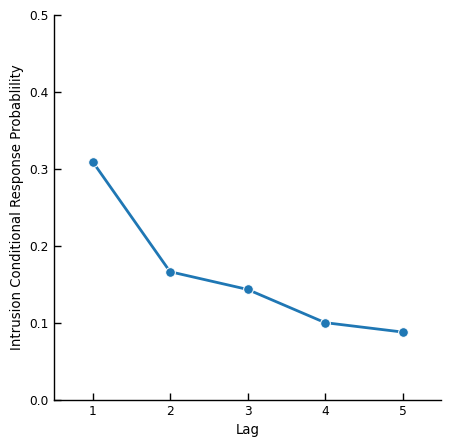

In [29]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp.query("list_abs_lag < 6"), x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
plt.xlim([0.5,5.5])
plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('simu7_fig/simu7_PLI.pdf')
plt.show()

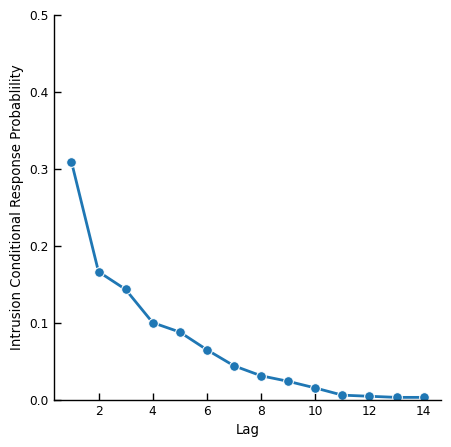

In [23]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
sns.lineplot(data=df_PLIgp, x='list_abs_lag', y='PLI_prob', linewidth=2, marker='o', markersize = 7)
plt.ylim([0,0.5])
# plt.xlim([0.5,5.5])
# plt.xticks(ticks=np.arange(1,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
# plt.savefig('fig/simu7_PLI.pdf')
plt.show()

### ILI

In [24]:
df_ILI = df_simu.query("intrusion_type == 'ILI'")
df_ILI

,list,session,test_itemno,s_resp,s_rt,csim,test_item,correct_ans,study_pos,test_dir,correct,resp_study_list,resp_study_pos,list_lag,pos_lag,intrusion_type
8,1,0,1141,232.0,2000.0,0.712679,PUMP,1248,10,1,False,1.0,9.0,0.0,-1.0,ILI
9,1,0,1540,506.0,2640.0,0.730168,UNIVERSE,232,9,0,False,1.0,11.0,0.0,2.0,ILI
12,1,0,844,1102.0,2410.0,0.659045,LOOP,396,5,1,False,1.0,7.0,0.0,2.0,ILI
13,1,0,586,396.0,2280.0,0.781052,FLY,1446,4,1,False,1.0,5.0,0.0,1.0,ILI
15,1,0,666,1446.0,2770.0,0.734051,GROUND,456,3,0,False,1.0,4.0,0.0,1.0,ILI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127977,13,999,1136,1385.0,4520.0,0.681373,PUBLICATION,347,11,0,False,13.0,10.0,0.0,-1.0,ILI
127978,13,999,379,1430.0,2290.0,0.636673,CORD,1395,1,1,False,13.0,2.0,0.0,1.0,ILI
127982,13,999,1385,1285.0,2610.0,0.596352,STONE,1151,10,0,False,13.0,0.0,0.0,-10.0,ILI
127984,14,999,136,480.0,2560.0,0.639867,BLENDER,527,7,0,False,14.0,0.0,0.0,-7.0,ILI


In [25]:
df_ILI.groupby("list")["pos_lag"].mean()

list
1    -1.709016
2    -2.093095
3    -2.184371
4    -2.045804
5    -2.133426
6    -2.115619
7    -2.183582
8    -2.193705
9    -2.217463
10   -2.238215
11   -2.160416
12   -2.169427
13   -2.156942
14   -2.208214
15   -2.275168
Name: pos_lag, dtype: float64

In [26]:
possible_ILI_cnt = {}
for pair_pos in df_ILI.study_pos:
    l_bound = -pair_pos
    r_bound = 11 - pair_pos
    for i in np.arange(l_bound, r_bound + 1):
        if i in possible_ILI_cnt:
            possible_ILI_cnt[i] += 1
        else:
            possible_ILI_cnt[i] = 1
possible_ILI_cnt

{-10: 5620,
 -9: 9232,
 -8: 12928,
 -7: 16671,
 -6: 20455,
 -5: 24246,
 -4: 28053,
 -3: 31710,
 -2: 35100,
 -1: 37770,
 0: 39849,
 1: 37400,
 2: 34229,
 3: 30617,
 4: 26921,
 5: 23178,
 6: 19394,
 7: 15603,
 8: 11796,
 9: 8139,
 10: 4749,
 11: 2079,
 -11: 2449}

In [27]:
df_ILIgp = df_ILI.groupby("pos_lag")['test_item'].count().to_frame(name='ILI_cnt')
df_ILIgp['poss_ILI_cnt'] = pd.Series(possible_ILI_cnt)
df_ILIgp['ILI_prob'] = df_ILIgp['ILI_cnt'] / df_ILIgp['poss_ILI_cnt']
df_ILIgp

,ILI_cnt,poss_ILI_cnt,ILI_prob
pos_lag,,,
-11.0,877,2449,0.358105
-10.0,1351,5620,0.240391
-9.0,1553,9232,0.168219
-8.0,1803,12928,0.139465
-7.0,1894,16671,0.113610
-6.0,2125,20455,0.103887
-5.0,2261,24246,0.093252
-4.0,2541,28053,0.090579
-3.0,2882,31710,0.090886


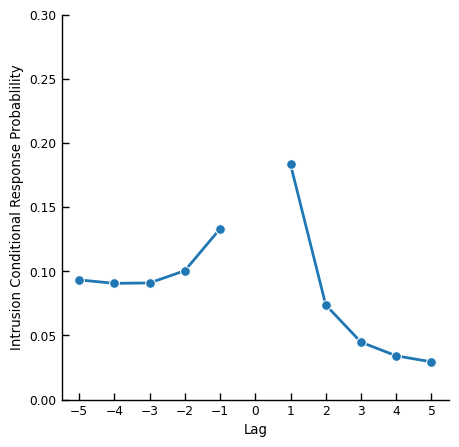

In [28]:
fig,ax = plt.subplots(figsize=(5,5))
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

sns.lineplot(data=df_ILIgp.query("-6 < pos_lag < 0"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
sns.lineplot(data=df_ILIgp.query("0 < pos_lag < 6"), x='pos_lag', y='ILI_prob', linewidth=2, marker='o', markersize = 7,color='C0')
plt.ylim([0,0.3])
plt.xticks(ticks=np.arange(-5,6))
plt.xlabel('Lag')
plt.ylabel('Intrusion Conditional Response Probablility')
plt.savefig('simu7_fig/simu7_ILI.pdf')
plt.show()